**Catalog**
- Gradient Descent
- Linear Regression
- Logistic Regression

https://github.com/AryeYellow/PyProjects/blob/master/DataScience/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E5%92%8C%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92.ipynb

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
%matplotlib inline
import matplotlib.pyplot as mp, numpy as np

## 梯度下降

**梯度**
- 是一个向量，表示某一函数在该点处的方向导数沿着该方向取得最大值

**梯度下降**
- 沿梯度下降的方向求解极小值，是机器学习中常用的迭代算法

**梯度下降算法**：以 $f(x)=x^2−2x+1$ 为例，求函数的极值点
- 求导数：$f'(x)=2x−2$
- 计算机使用迭代的方法，一步一步逼近极值点（向梯度相反的方向移动）
- 迭代公式：$x_{i+1}=x_i-\alpha\frac{\partial f(x_i)}{x_i}=x_i-\alpha(2x_i-2)$

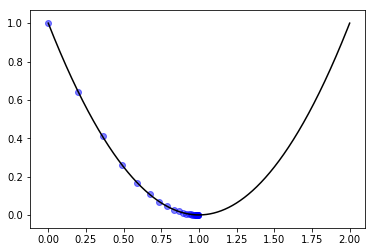

In [2]:
"""原函数"""
fn = lambda x: x ** 2 - 2 * x + 1
x = np.linspace(0, 2, 9999)
mp.plot(x, fn(x), c='black')  # 绘制函数曲线

"""导数"""
derivative = lambda x: 2 * x - 2

"""梯度下降求极值点"""
extreme_point = 0  # 初始化极值点
alpha = 0.1  # 学习速率
presision = 0.001  # 允许误差范围
error = np.inf  # 初始化误差
while abs(error) >= presision:  # 误差足够小时退出迭代
    mp.scatter(extreme_point, fn(extreme_point), c='b', alpha=.5)  # 绘制散点
    error = alpha * derivative(extreme_point)  # 步伐
    extreme_point -= error  # 梯度下降
mp.show()

## 线性回归
https://blog.csdn.net/Yellow_python/article/details/81224614

创建数据

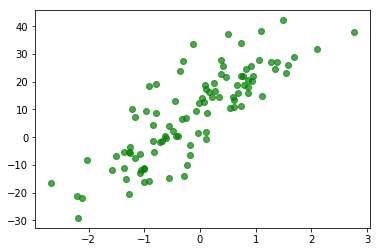

In [4]:
from sklearn.datasets import make_regression
bias = 10.0  # 偏差
X, Y, coef = make_regression(n_features=1, noise=9, bias=bias, coef=True)
X = X.reshape(-1)
mp.scatter(X, Y, c='g', alpha=.7)
mp.show()

$f(x) = w x + b$

$loss = \frac{1}{m} \sum _{i=0}^m (y_i - (w x_i + b))^2$

In [5]:
loss = lambda w, b: np.mean([(y - (w * x + b)) ** 2 for x, y in zip(X, Y)])

$\frac{\partial loss}{\partial w} = \frac{1}{m} \sum_{i=0}^m 2x_i(w x_i + b - y_i)$

$\frac{\partial loss}{\partial b} = \frac{1}{m} \sum_{i=0}^m 2(w x_i + b - y_i)$

$ w := w - \alpha \frac{\partial loss}{\partial w} $

$ b := b - \alpha \frac{\partial loss}{\partial b} $

In [6]:
def gradient_descent(w, b, lr):
    for x, y in zip(X, Y):
        w -= lr * (((w * x) + b) - y) * x
        b -= lr * (((w * x) + b) - y)
    return w, b

迭代更新

In [7]:
w, b = .0, .0  # 系数初始化
lr = .007  # 学习率
for i in range(10):
    print('step%d loss: %.4f' % (i, loss(w, b)))  # 打印损失值
    w, b = gradient_descent(w, b, lr)  # 参数更新
print(coef, bias, '|', w, b, '|', loss(w, b))

step0 loss: 330.3465
step1 loss: 148.5865
step2 loss: 99.0237
step3 loss: 85.3904
step4 loss: 81.6123
step5 loss: 80.5582
step6 loss: 80.2621
step7 loss: 80.1782
step8 loss: 80.1543
step9 loss: 80.1474
11.676190358069949 10.0 | 12.820284733715095 10.27228390149755 | 80.14540767642679


可视化

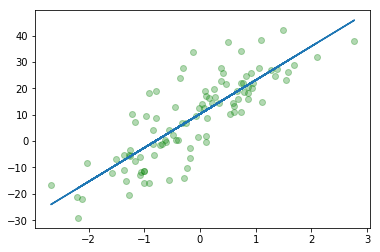

In [8]:
mp.scatter(X, Y, c='g', alpha=.3)
mp.plot(X, w * X + b)
mp.show()

## 逻辑回归
https://blog.csdn.net/Yellow_python/article/details/81240395

$$L(\theta)= \sum_{i=1}^n (y_i \log h_{\theta}(x_i) + (1-y_i) \log (1-h_{\theta}(x_i)))$$

$$\frac{\partial L(\theta)}{\partial \theta} = \sum_{i=1}^n (y_i - h_{\theta}(x_i))x_i$$

$$\theta^{t+1} = \theta^t + \alpha \frac{1}{n} \sum_{i=1}^n (y_i - h_{\theta}(x_i))x_i$$

**创建随机样本**

(100, 2) (100,)


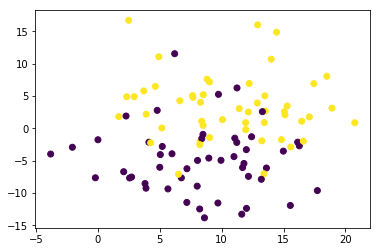

In [5]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(centers=2, cluster_std=5)
print(X.shape, Y.shape)
mp.scatter(X[:, 0], X[:, 1], c=Y)
mp.show()

**Sigmoid**

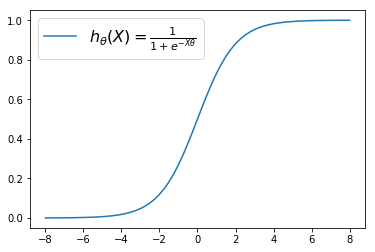

In [6]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
x = np.linspace(-8, 8, 65)
mp.plot(x, sigmoid(x), label=r'$h_{\theta}(X)=\frac{1}{1+e^{-X \theta}}$')
mp.legend(prop={'size': 16})
mp.show()

**数据处理**

In [7]:
X = np.insert(X, 0, 1, axis=1)  # 插入一列常量，用于计算偏差
Y = Y.reshape(-1, 1)
X.shape, Y.shape

((100, 3), (100, 1))

$$
X =
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{pmatrix}
=
\begin{pmatrix}
1 & x_{12} & x_{13} & \cdots & x_{1m} \\
1 & x_{22} & x_{33} & \cdots & x_{2m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n2} & x_{n3} & \cdots & x_{nm} \\
\end{pmatrix}
_{n \times m}
y =
\begin{bmatrix}
	y_1 \\ y_2 \\ \vdots \\ y_n 
\end{bmatrix}
_{n \times 1}
$$

**系数初始化**

In [8]:
d = X.shape[1]  # 维数
theta = np.mat([[1]] * d)  # 系数初始化

$$
\theta =
\begin{bmatrix}
	\theta_1 \\ \theta_2 \\ \vdots \\ \theta_m 
\end{bmatrix}
_{m \times 1}
$$

**梯度上升**

$ \sum_{i=1}^n (h_{\theta}(x_i) - y_i)x_i = X^T (y - h_{\theta}(X)) $

$ \theta := \theta + \alpha X^T (y - h) $

In [9]:
alpha = 1 / 6000
for i in range(5999, 8999):
    h = sigmoid(X * theta)
    error = Y - h
    theta = theta + alpha * X.T * error  # 最终梯度上升迭代公式

$$
X \theta =
\begin{pmatrix}
\theta_1 + x_{12} \theta_2 + x_{13} \theta_3 + \cdots + x_{1m} \theta_n \\
\theta_1 + x_{22} \theta_2 + x_{33} \theta_3 + \cdots + x_{2m} \theta_n \\
\vdots \\
\theta_1 + x_{n2} \theta_2 + x_{n3} \theta_3 + \cdots + x_{nm} \theta_n \\
\end{pmatrix}
_{n \times 1}
X^T =
\begin{pmatrix}
1 & 1 & \cdots & 1 \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn} \\
\end{pmatrix}
_{m \times n}
X^T(y-h)_{m \times 1}
$$

![](https://img-blog.csdnimg.cn/2019010421374960.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_50,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L1llbGxvd19weXRob24=,size_16,color_FFFFFF,t_70)

**可视化**

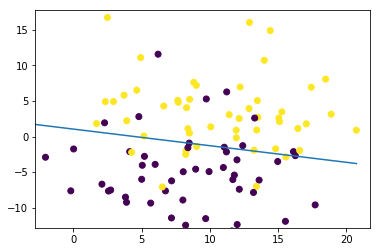

In [10]:
x1, x2 = X[:, 1], X[:, 2]
mp.axis([x1.min() + 1, x1.max() + 1, x2.min() + 1, x2.max() + 1])
mp.scatter(x1, x2, c=Y.reshape(-1))  # 原始样本点
x = np.array([x1.min(), x1.max()])
y = (-theta[0, 0] - theta[1, 0] * x) / theta[2, 0]  # 决策边界
mp.plot(x, y)
mp.show()

## 动态展示

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
%matplotlib qt5
import matplotlib.pyplot as mp, numpy as np
np.random.seed(2)

In [2]:
"""原函数"""
fn = lambda x: x ** 2 - 2 * x + 1
x = np.linspace(0, 2, 9999)
mp.plot(x, fn(x), c='black')  # 绘制函数曲线

"""导数"""
derivative = lambda x: 2 * x - 2

"""梯度下降求极值点"""
extreme_point = 0  # 初始化极值点
alpha = 0.1  # 步长，即学习速率
presision = .01  # 允许误差范围
error = np.inf  # 初始化误差
while abs(error) >= presision:  # 误差足够小时退出迭代
    mp.scatter(extreme_point, fn(extreme_point), c='b', alpha=.5)  # 绘制散点
    error = alpha * derivative(extreme_point)  # 步伐
    extreme_point -= error  # 梯度下降
    mp.pause(.2)  # 动图

In [5]:
"""创建数据"""
from sklearn.datasets import make_regression
X, Y = make_regression(n_features=1, noise=9, )
X = X.reshape(-1)

"""参数更新"""
def gradient_descent(w, b, lr):
    for x, y in zip(X, Y):
        w -= lr * (((w * x) + b) - y) * x
        b -= lr * (((w * x) + b) - y)
    return w, b

"""运行过程可视化"""
fig, ax = mp.subplots()
w, b = .0, .0
for i in range(160, 170):
    w, b = gradient_descent(w, b, 1 / i)  # 先大后小的学习率
    ax.cla()  # 清除
    mp.scatter(X, Y, c='g', alpha=.3)  # 散点图
    ax.plot(X, w * X + b)  # 折线图
    mp.pause(.2)  # 限时展示

In [8]:
"""创建随机样本"""
from sklearn.datasets import make_blobs
X, Y = make_blobs(centers=2, cluster_std=5, random_state=1)

"""数据处理"""
X = np.insert(X, 0, 1, axis=1)  # 增加一列，用于矩阵相乘
Y = Y.reshape(-1, 1)
x1, x2 = X[:, 1], X[:, 2]
fig, ax = mp.subplots()  # 创建绘图对象

"""sigmoid函数"""
sigmoid = lambda x: 1 / (1 + np.exp(-x))

"""梯度上升"""
d = X.shape[1]  # 维数
theta = np.mat([[1]] * d)  # 初始化回归系数
for i in range(800, 900):
    alpha = 1 / i  # 步长（先大后小）
    h = sigmoid(X * theta)
    theta = theta + alpha * X.T * (Y - h)  # 最终梯度上升迭代公式
    """数据可视化"""
    ax.cla()  # 清除
    ax.axis([x1.min() + 1, x1.max() + 1, x2.min() + 1, x2.max() + 1])
    ax.scatter(x1, x2, c=Y.reshape(-1))  # 原始样本点
    x = np.array([x1.min(), x1.max()])
    y = (-theta[0, 0] - theta[1, 0] * x) / theta[2, 0]  # 决策边界
    ax.plot(x, y)
    mp.pause(1e-9)

## 调用sklearn

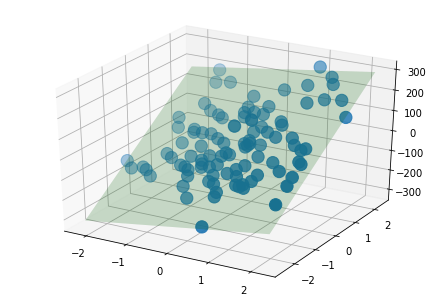

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np, matplotlib.pyplot as mp
from mpl_toolkits import mplot3d  # 绘制3d图
%matplotlib inline

"""数据加载"""
X, Y = make_regression(n_features=2, noise=9, random_state=0)
Y = Y.reshape(-1, 1)
X1, X2 = X[:, 0], X[:, 1]

"""建模、拟合"""
model = LinearRegression().fit(X, Y)

"""系数、截距"""
w0, (w1, w2) = model.intercept_[0], model.coef_[0]

"""可视化"""
ax = mplot3d.Axes3D(mp.figure())  # 获取三维坐标轴
ax.scatter(X1, X2, Y, s=150)  # 散点图
x = np.array([[X1.min(), X2.min()], [X1.min(), X2.max()], [X1.max(), X2.min()]])
x1, x2 = np.meshgrid(x[:, 0], x[:, 1])  # 3d格点矩阵
y = w0 + w1 * x1 + w2 * x2  # 边界函数
ax.plot_surface(x1, x2, y, alpha=0.1, color='green')  # 拟合平面
mp.show()

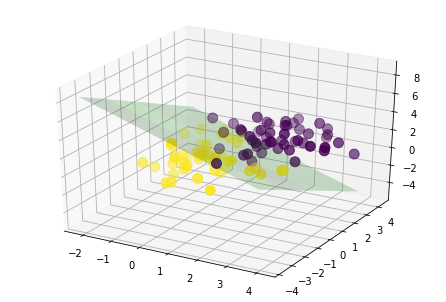

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LogisticRegression
import numpy as np, matplotlib.pyplot as mp
from mpl_toolkits import mplot3d
%matplotlib inline

"""创建数据"""
X, y = make_blobs(centers=[[2, 2, 2], [0, 0, 0]], random_state=3)

"""建模"""
model = LogisticRegression()
model.fit(X, y)

"""系数（coefficient）和截距"""
w0, (w1, w2, w3) = model.intercept_[0], model.coef_[0]

"""可视化"""
ax = mplot3d.Axes3D(mp.figure())  # 获取三维坐标轴
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=99, c=y)  # 散点图
x1 = np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 2)
x2 = np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 2)
x1, x2 = np.meshgrid(x1, x2)  # 3d网格
x3 = (w0 + w1 * x1 + w2 * x2) / -w3  # 边界函数
ax.plot_surface(x1, x2, x3, alpha=0.2, color='g')  # 拟合平面
mp.show()